In [1]:
from math import cos, sin

import matplotlib.pyplot as plt

g = 9.8  # used for gravity constant

In [2]:
v0 = 1.0
dt = 0.00001
x0 = 0.0
y0 = 0.0
alpha = 0.8
step = 0.0  # y
len_of_step = 0.15  # x

x_step = 0.15
y_step = -0.25
n_step = 12
x_coords = []
y_coords = []
x_coords.append(x0)
y_coords.append(y0)

In [3]:
vx0 = v0 * cos(alpha)
vy0 = v0 * sin(alpha)

In [4]:
# vyn = vyn-1 - g * dt
# vxn = vxn-1
# yn = yn-1 + vyn * dt
# xn = xn-1 + vxn * dt

In [5]:
def get_next_state(previous_state: tuple) -> tuple:
    x, y, vx, vy, len_of_step_x, step_y = previous_state
    vy_next = vy - g * dt
    if (x < len_of_step_x) & (y <= step_y):
        vy_next *= -1
    if (x > len_of_step_x) & (y >= step_y):
        len_of_step_x += 0.15
        step_y -= 0.25
    y_next = y + vy_next * dt
    x_next = x + vx * dt
    return x_next, y_next, vx, vy_next, len_of_step_x, step_y

In [6]:
def get_trajectory() -> list:
    trajectory = []
    state = (x0, y0, vx0, vy0, len_of_step, step)
    for i in range(250000):
        trajectory.append(state)
        state = get_next_state(state)
    return trajectory


trajectory = get_trajectory()

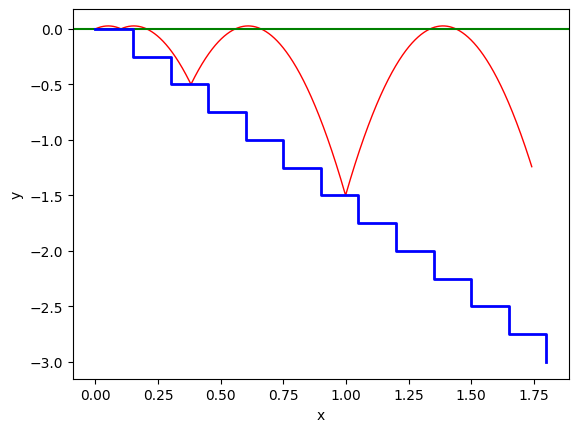

In [7]:
def plot_trajectory(trajectory: list):
    x = [state[0] for state in trajectory]
    y = [state[1] for state in trajectory]
    plt.plot(x, y, color='red', linewidth=1)
    plt.axhline(y=0, color='green', linestyle='-')
    plt.xlabel('x')
    plt.ylabel('y')

    for i in range(n_step):
        x_coords.append(x_coords[-1] + x_step)
        y_coords.append(y_coords[-1])
        x_coords.append(x_coords[-1])
        y_coords.append(y_coords[-1] + y_step)
    plt.plot(x_coords, y_coords, color='blue', linewidth=2)
    plt.show()


plot_trajectory(trajectory)

